In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_basecase.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_basecase.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

#At this point only have 25% for pop and flow, now we scale them up

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]

to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

to_this_origin

from_this_origin

np.sum(pop,axis = 1)

pop = pop + to_this_origin - from_this_origin

In [68]:
np.sum(pop,axis = 1)

array([4632672, 4632672, 4632672, 4632672, 4632672, 4632672, 4632672,
       4632672, 4632672, 4632672, 4632672, 4632672])

In [69]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
def sir_plot(res):
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital')     
    plt.legend()

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4632672.0
import random

random.seed(30)


OD_id = [p for p in range (0,309)]
# Take 20 random location
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
#Each location has 10 people infected at the beginning
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 800
res = {}
inf = 10
res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]


In [66]:
newI_50 = res['baseline'][2]

newI_50.astype(int)

newI_50 = np.sum(newI_50,axis=0)

In [70]:
newI_base = res['baseline'][2]

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)

In [27]:
newI_from_home = res['baseline'][2]

newI_from_home.astype(int)

newI_from_home = np.sum(newI_from_home,axis=0)

In [39]:
newI = newI_from_home - newI_base

In [71]:
newI = newI_50 - newI_base  

In [72]:
newI =  np.where(newI> 0, 0, newI) 
newI

array([-1319.27807833, -1767.10989208, -1757.63281613, -3931.41654145,
       -1851.04125048,  -441.38790951, -2087.15479412, -3488.88890516,
       -2691.03069728, -1218.02639317,  -570.63391576,     0.        ,
       -2348.67310191, -1591.68508243, -5123.57243105, -5492.37574534,
       -2470.3462508 , -2366.33462437, -3124.58970528, -3402.28608439,
       -1065.94783552, -2659.25393929, -1363.81888814,     0.        ,
       -1891.25143692, -5720.62236158, -2804.94504826, -2104.49656752,
       -3365.47446984,  -176.12113774, -4250.2306511 , -1252.40228115,
       -1713.94793924, -3214.27194529, -2376.0100817 , -1033.72438669,
       -1305.87355245, -3266.20320469, -4261.07661347, -4231.90134348,
        -210.34587146, -2561.0482731 , -1677.96637908, -2752.4639342 ,
       -1851.76342285, -2458.36134435,  -796.92427281, -3761.17780852,
       -2543.69006974, -4997.96589207,     0.        , -2110.83050597,
       -2991.85261307, -2430.10411405, -4949.67243738, -2806.53463303,
      

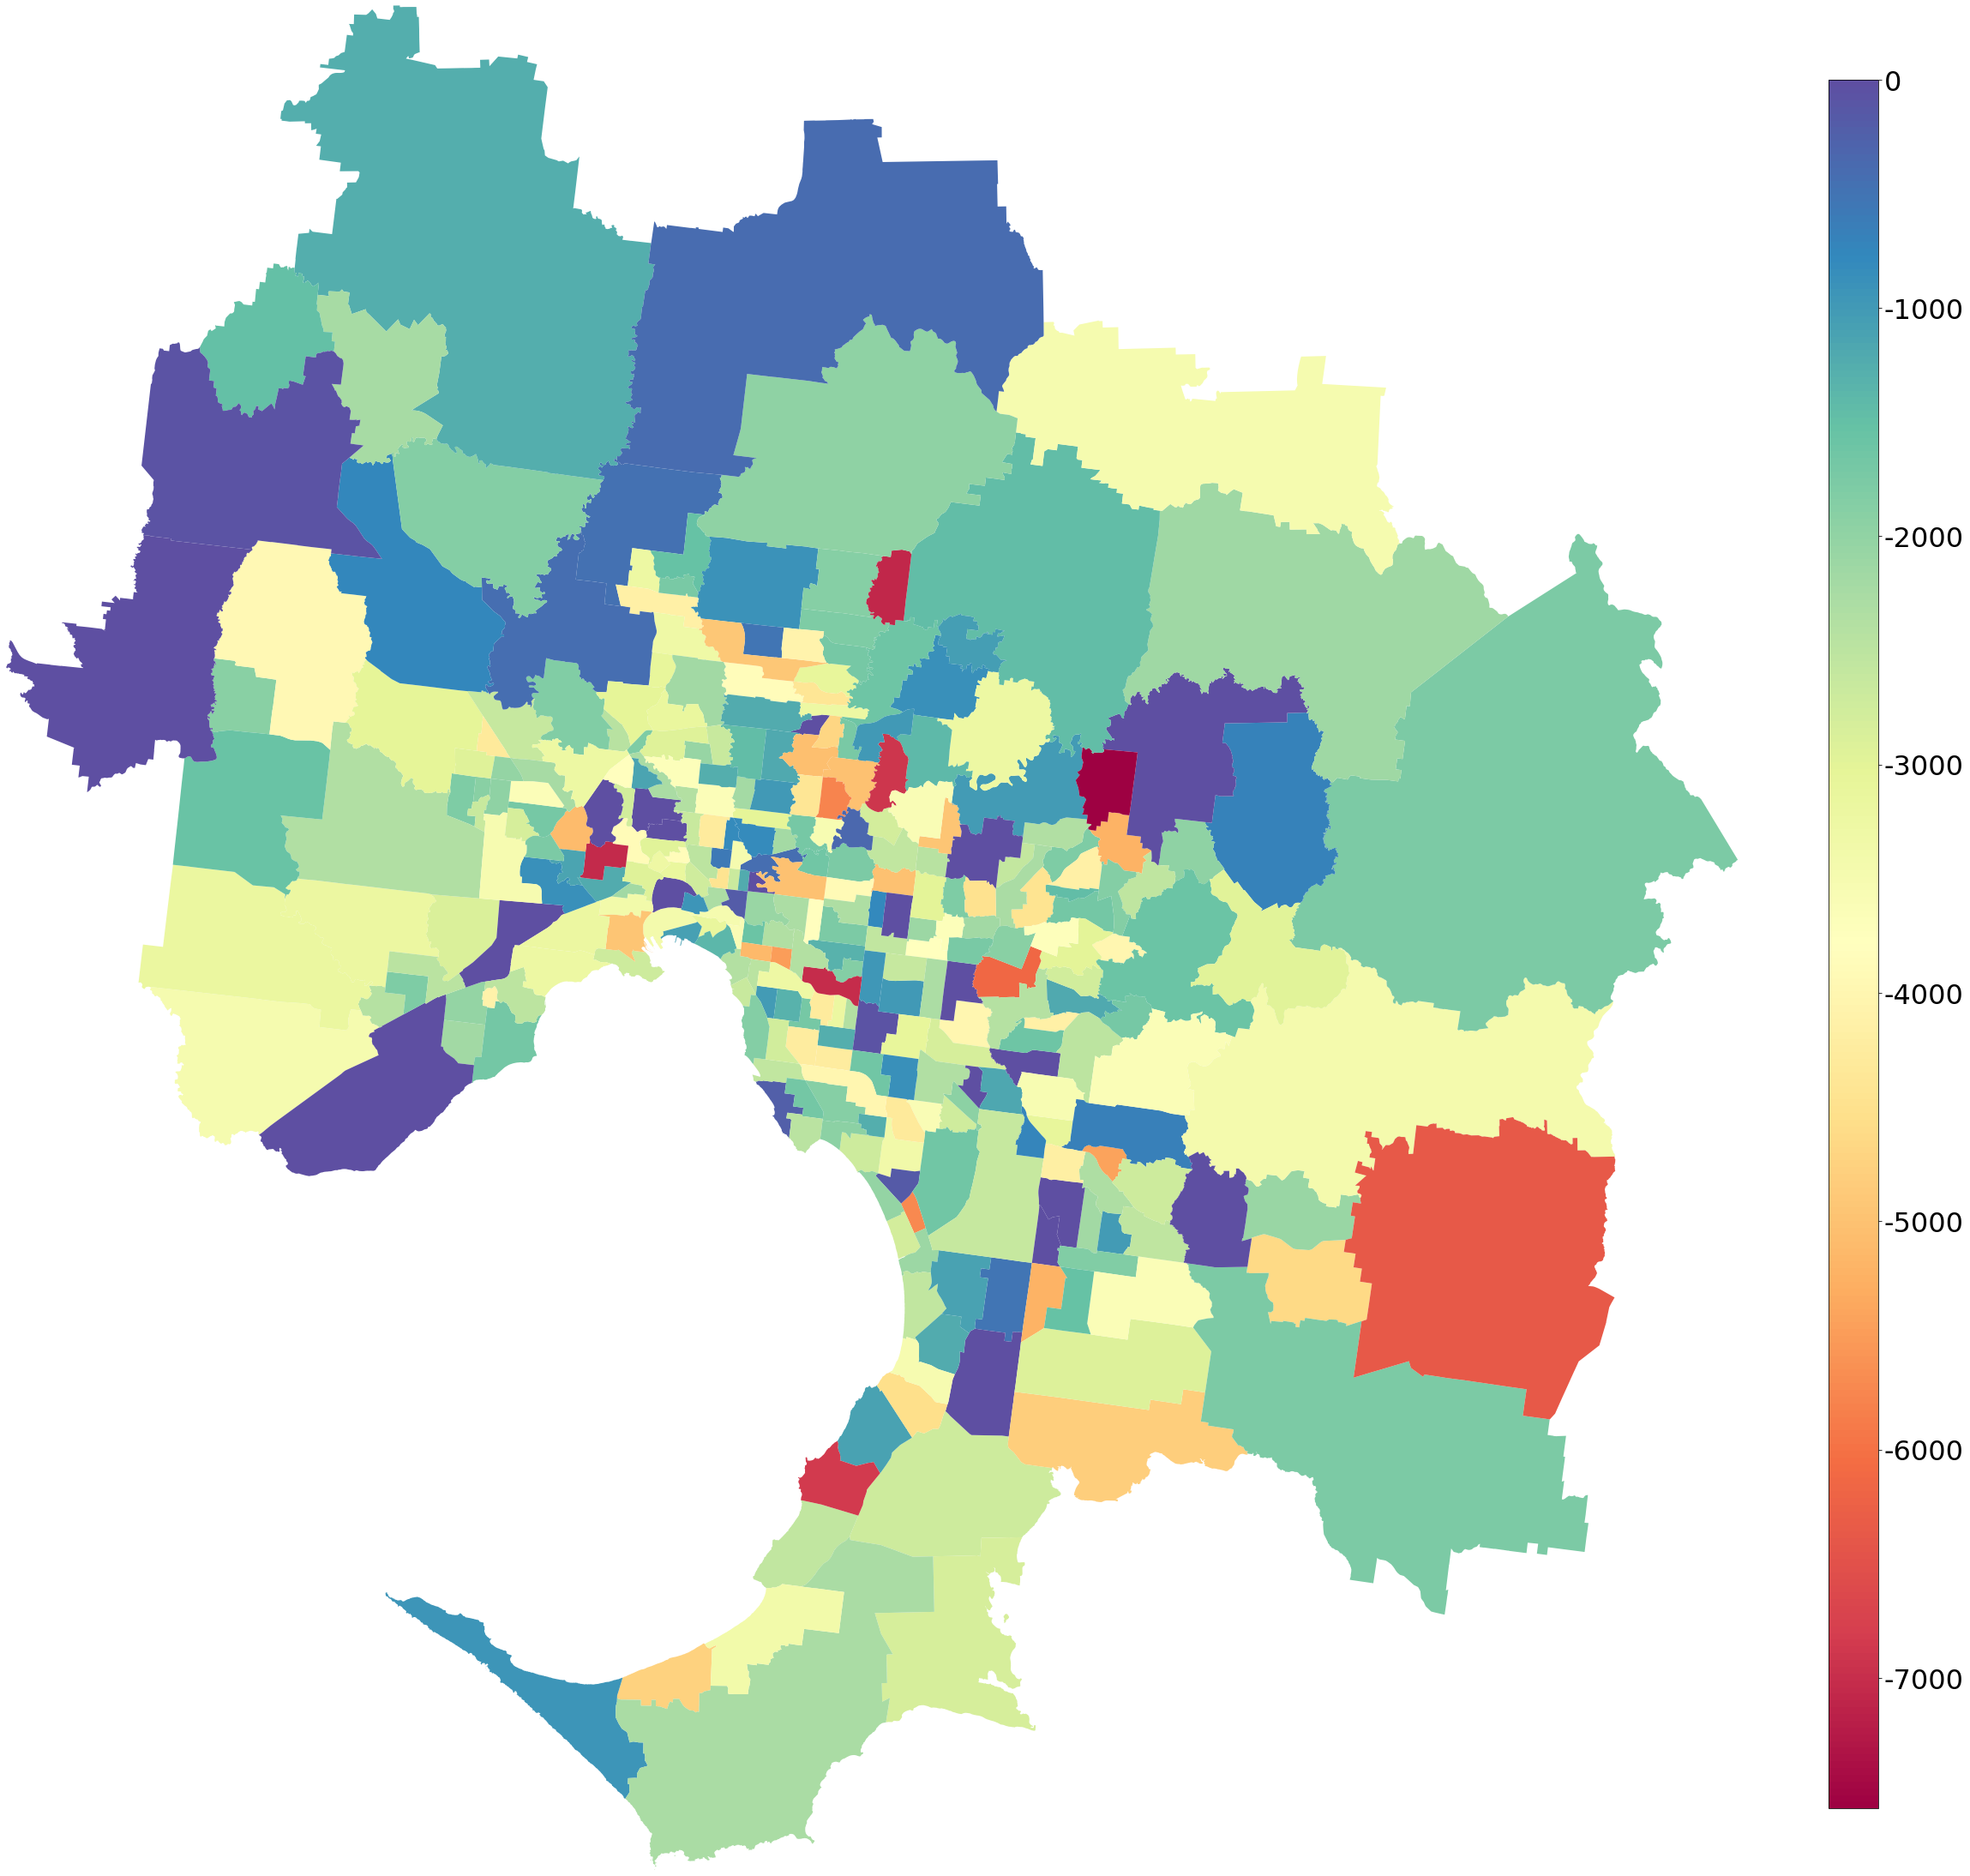

In [73]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Spectral')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Spectral',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_work_from_home_50_{}.jpg'.format(iterations))
plt.show()

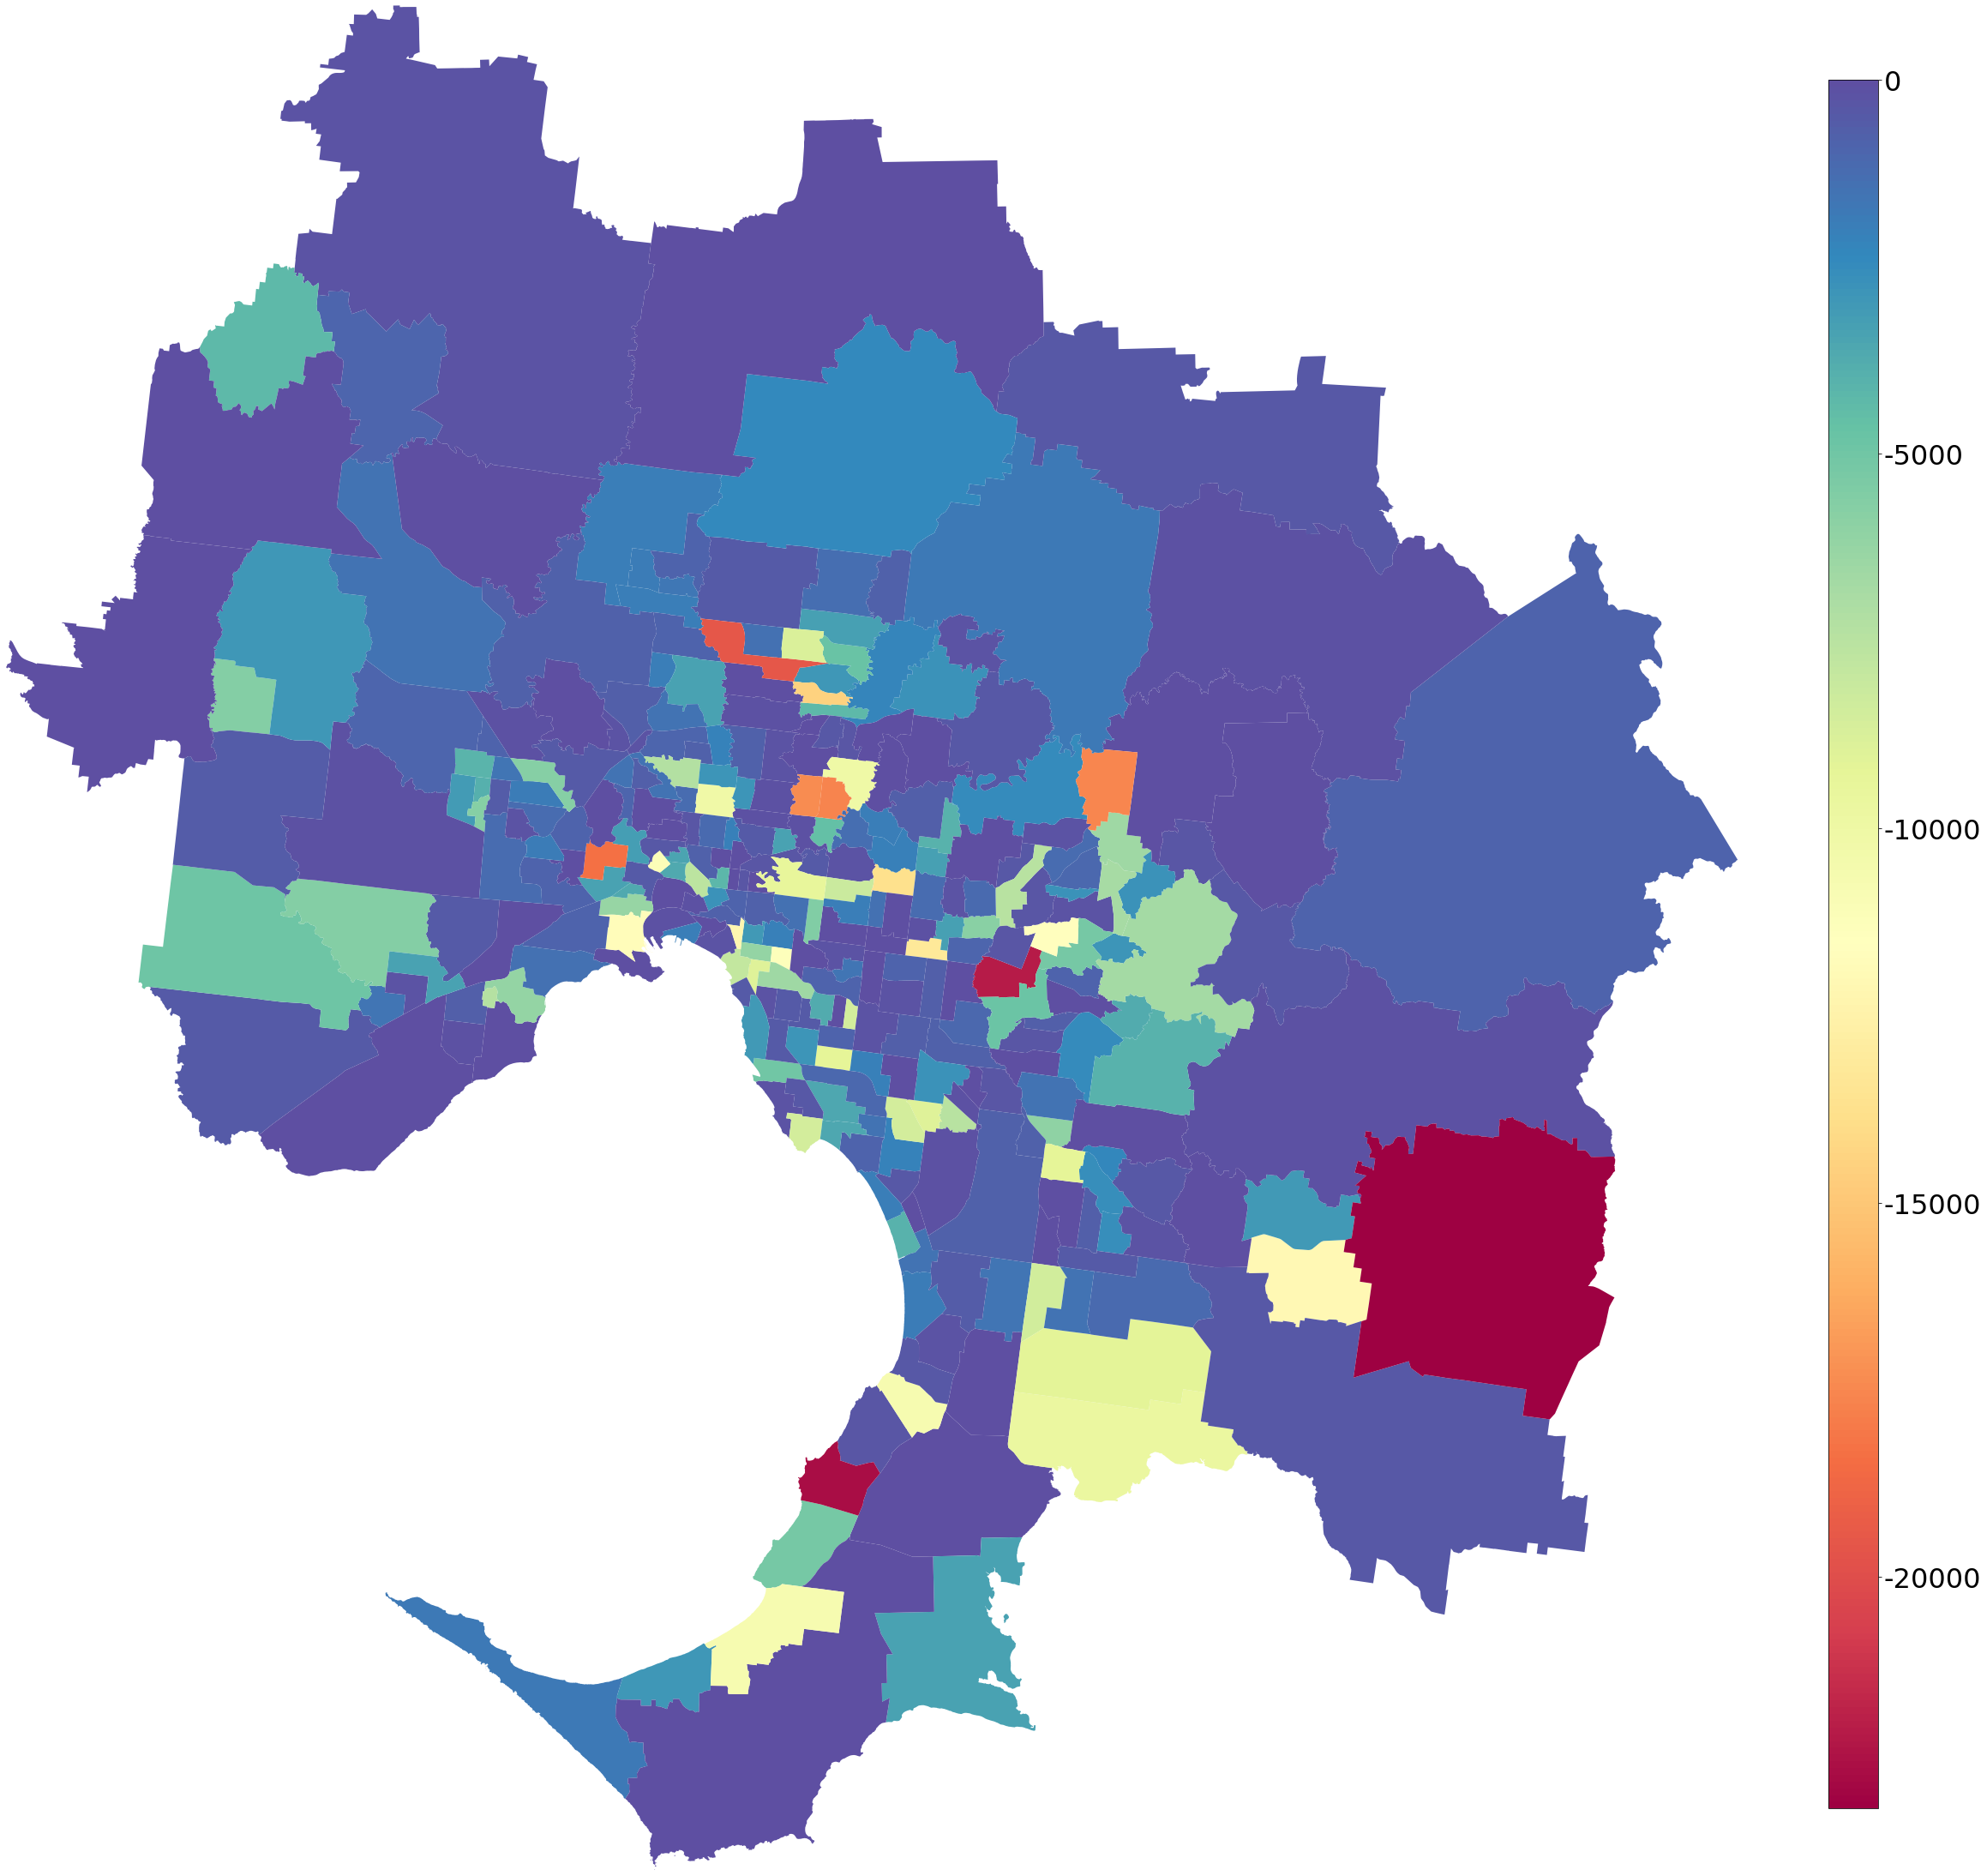

In [41]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI


plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Spectral')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Spectral',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('base_work_from_home_{}.jpg'.format(iterations))
plt.show()

In [ ]:
import geopandas as gpd
import contextily as ctx

#melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig("melbourne_infect_work_from_home_dis.jpg")
plt.show()

In [185]:
k = res['baseline'][0][::12,1]

In [197]:
i = res['baseline'][0][::12,1]

In [177]:
z = res['baseline'][0][::12,1]

In [181]:
y = res['baseline'][0][::12,1]

In [189]:
x = res['baseline'][0][::12,1]

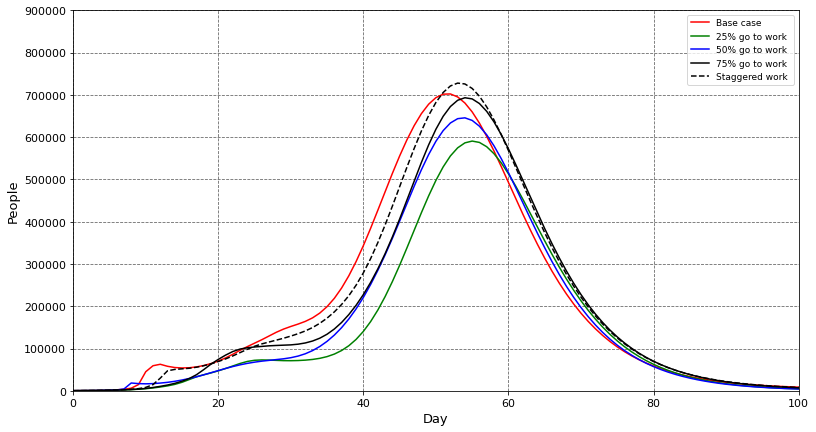

In [200]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 900000,100000)
    plt.xlabel("Day",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=11)
    plt.rc('ytick',labelsize=11)
    plt.legend(loc=1, prop={'size':9})
    
    plt.savefig('infected_workpercent_staggered_work_hour.jpg')
    
sir_plot_r(x,y,z,i,k) 

In [53]:
k = res['baseline'][0][::12,3]

In [37]:
i = res['baseline'][0][::12,3]

In [41]:
z = res['baseline'][0][::12,3]

In [45]:
y = res['baseline'][0][::12,3]

In [49]:
x = res['baseline'][0][::12,3]

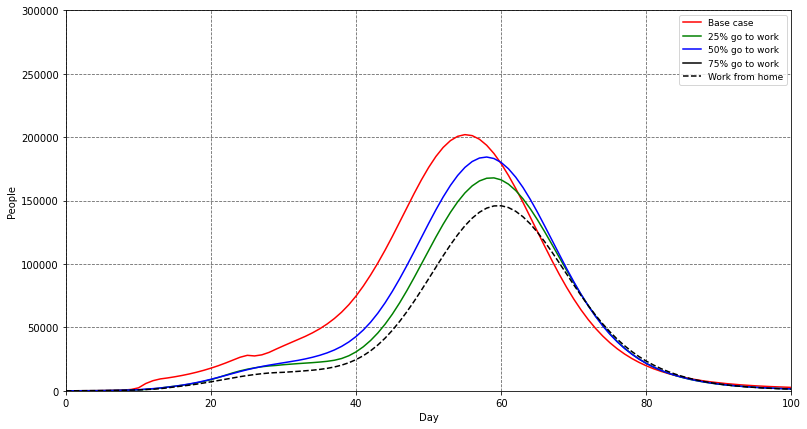

In [55]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 300000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='k',label='Work from home', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('hospitaled_workpercent_base_case.jpg')
    
sir_plot_r(x,y,z,i,k) 

In [25]:
k = res['baseline'][0][::12,1]

In [30]:
i = res['baseline'][0][::12,1]

In [12]:
z = res['baseline'][0][::12,1]

In [16]:
y = res['baseline'][0][::12,1]

In [20]:
x = res['baseline'][0][::12,1]

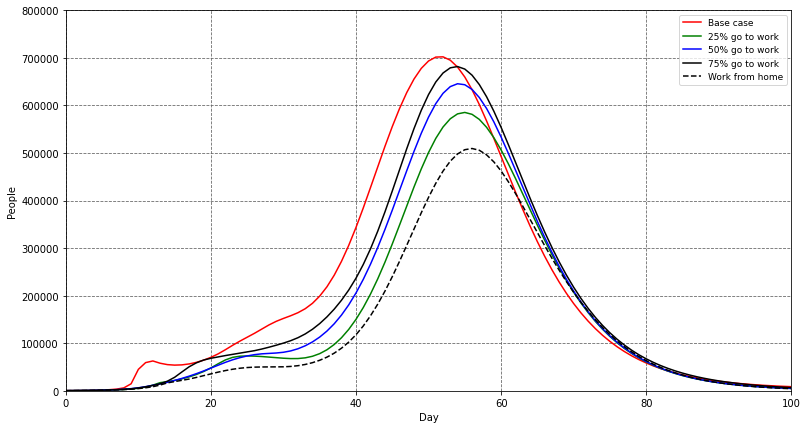

In [33]:
def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Base case')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='k',label='Work from home', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('intected_workpercent_base_case.jpg')
    
sir_plot_r(x,y,z,i,k) 

(110, 309)
18647.396998906297


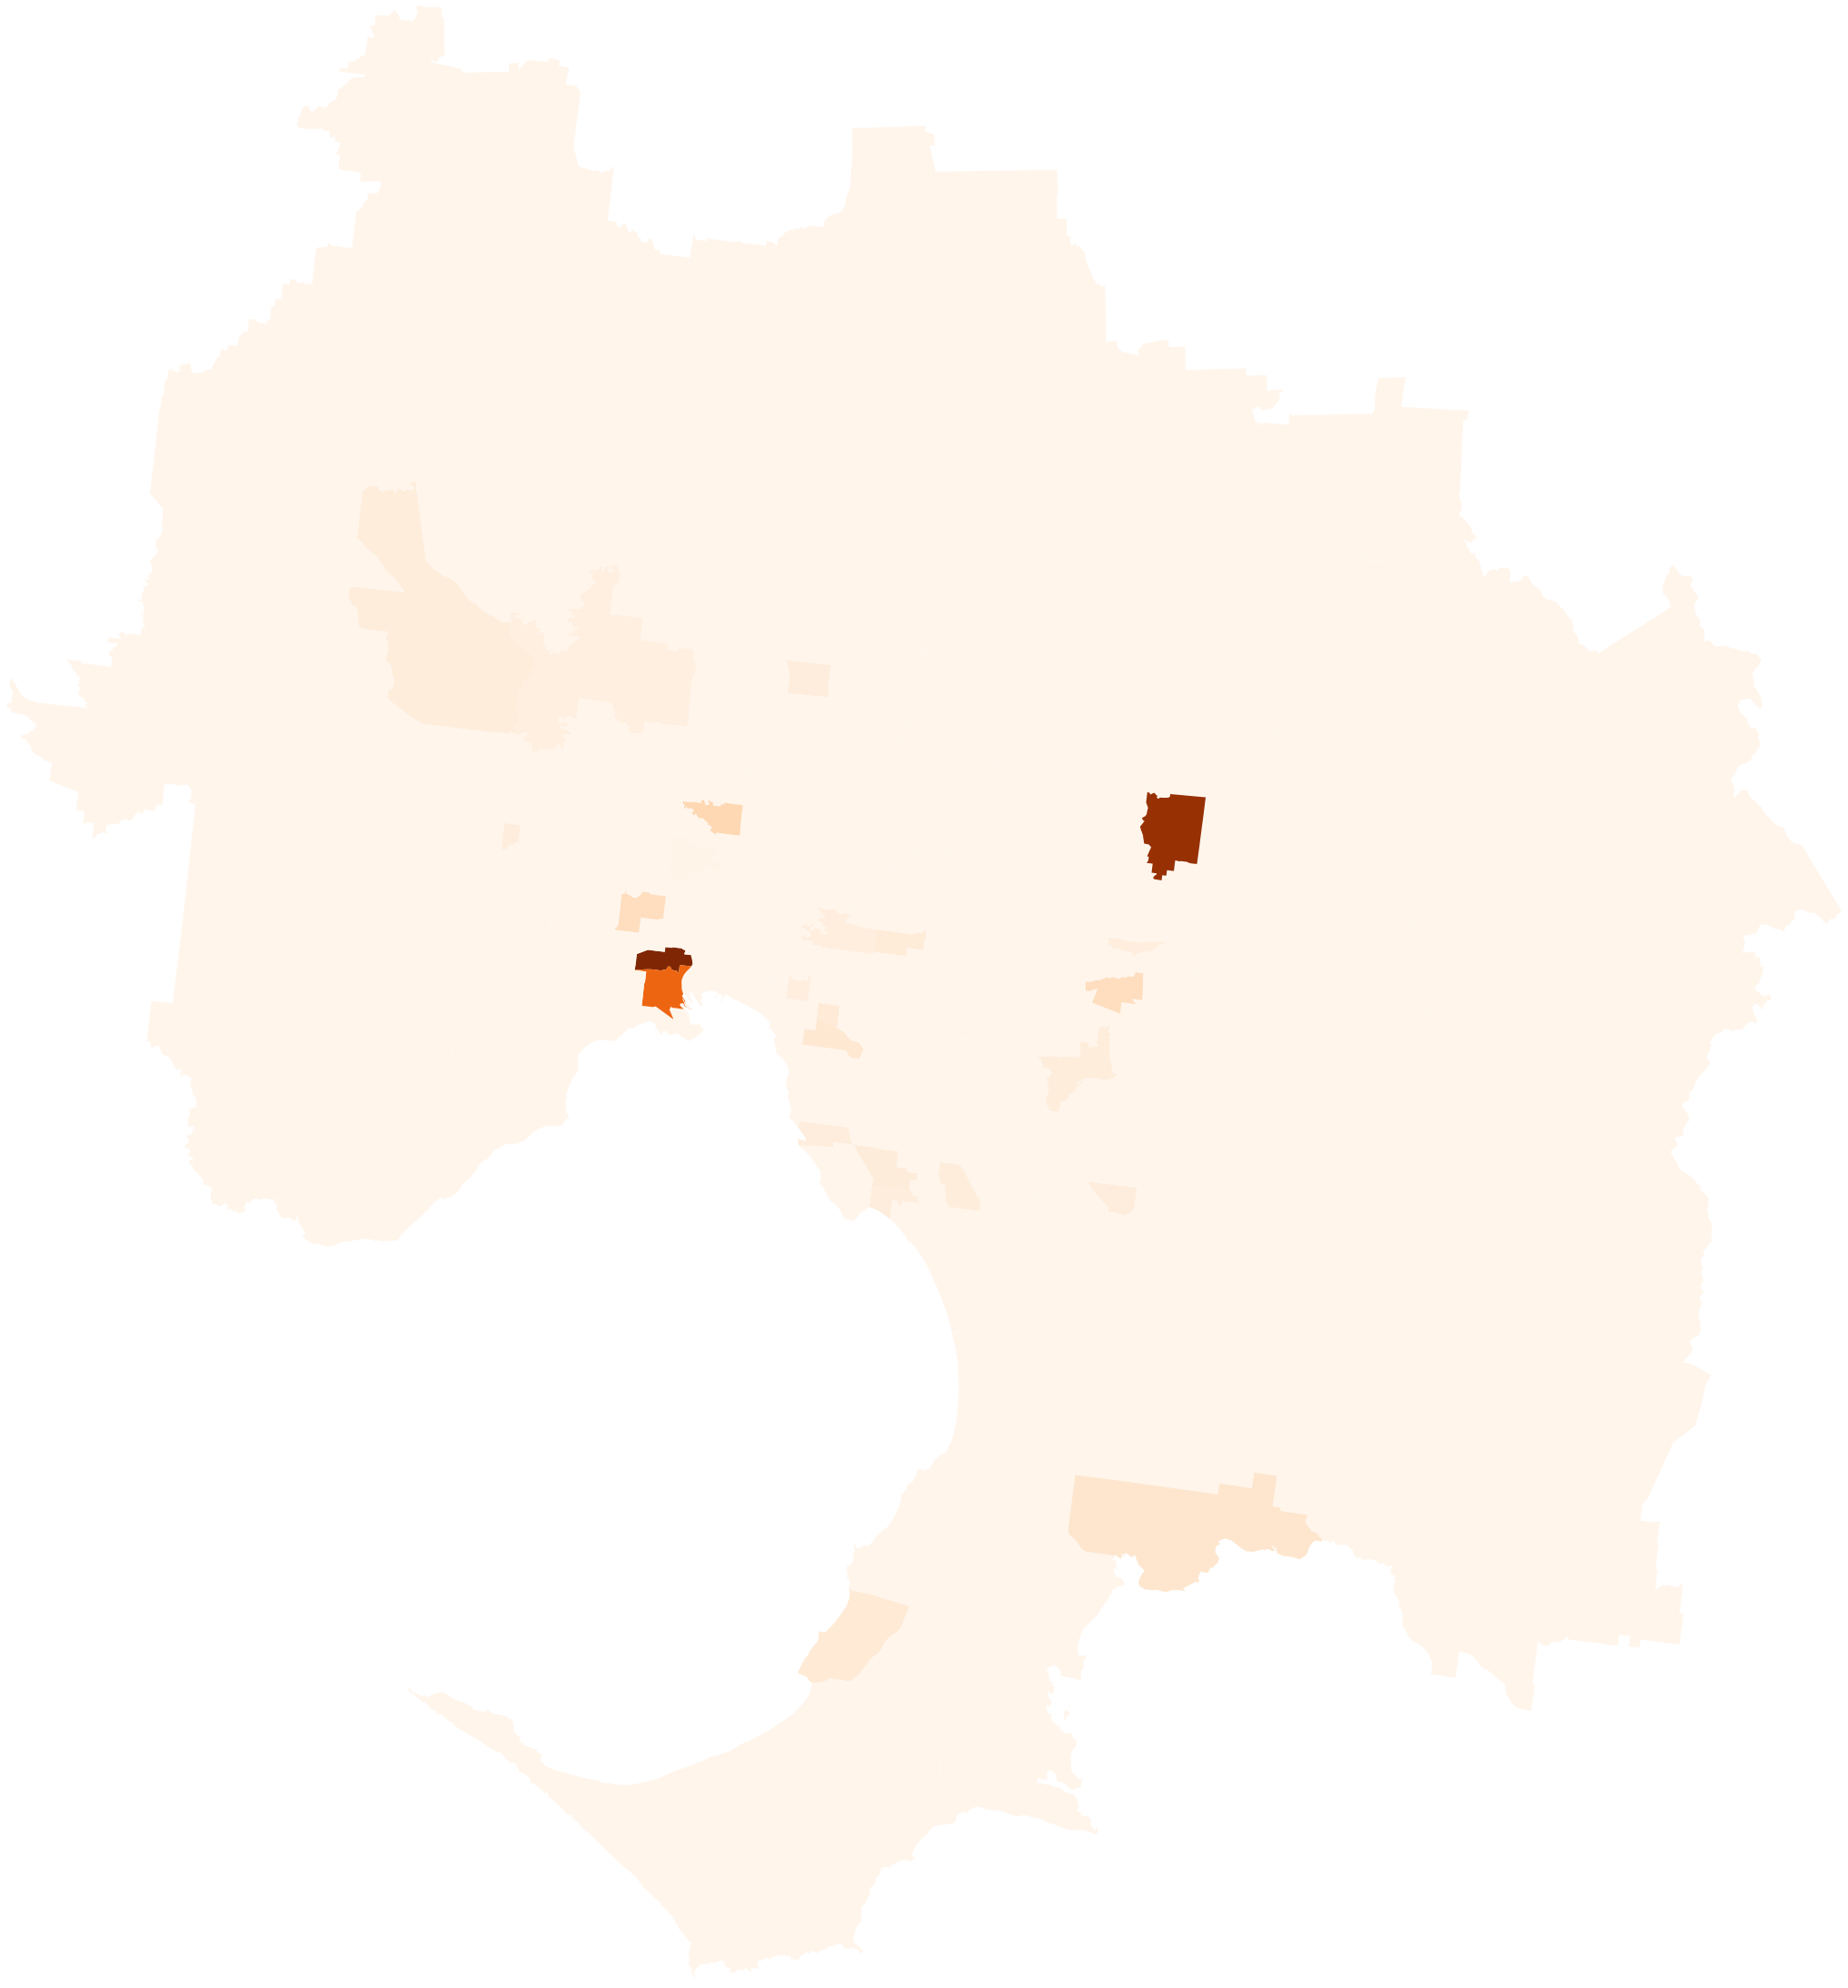

In [87]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

#cbax = fig.add_axes([0.9,0.15,0.02,0.7])

#sm = plt.cm.ScalarMappable(cmap='Oranges',\
                         # norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

#sm._A=[]

#Draw colormap into cbax

#fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
#plt.savefig('melbourne_infect_basecase_no_cb_{}.jpg'.format(iterations))
plt.show()

In [24]:
k = res['baseline'][0][::12,3]

In [37]:
z = res['baseline'][0][::12,3]

In [33]:
y = res['baseline'][0][::12,3]

In [41]:
x = res['baseline'][0][::12,3]

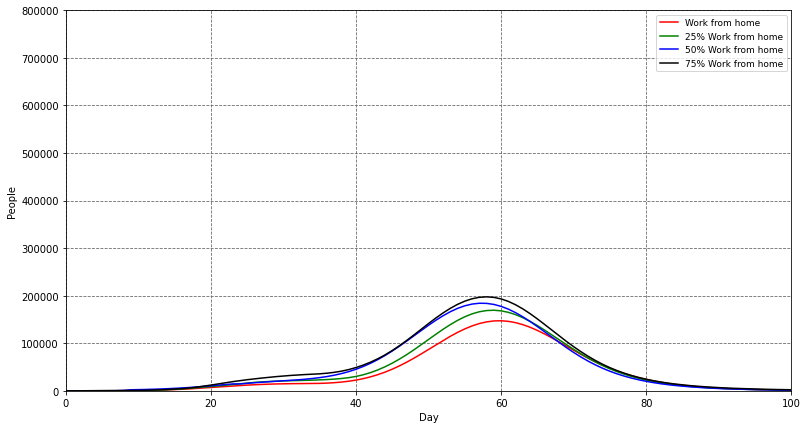

In [45]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% Work from home')
    plt.plot(z, color='b',label='50% Work from home')
    plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('hospitaled_workpercent.jpg')
    
sir_plot_r(x,y,z,k) 

In [21]:
k = res['baseline'][0][::12,1]

In [17]:
y = res['baseline'][0][::12,1]

In [13]:
y = res['baseline'][0][::12,1]

In [5]:
x = res['baseline'][0][::12,1]

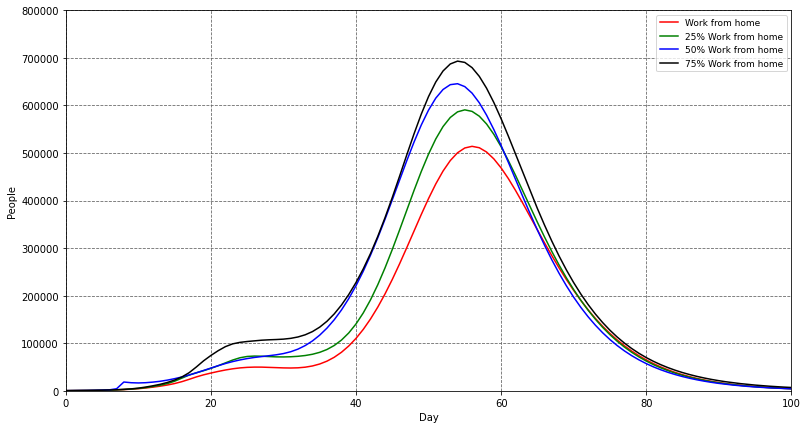

In [23]:
def sir_plot_r(x,y,z,i):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% Work from home')
    plt.plot(z, color='b',label='50% Work from home')
    plt.plot(i, color='k',label='75% Work from home')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    plt.savefig('intected_workpercent.jpg')
    
sir_plot_r(x,y,z,k) 

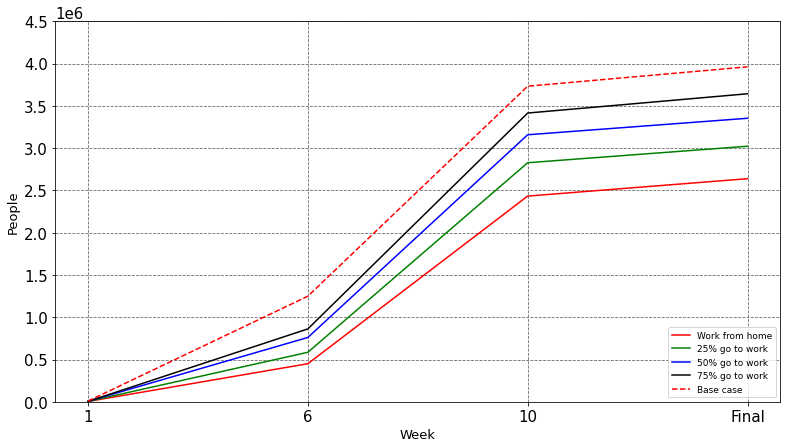

In [168]:
x = np.array([4222,450488,2432788,2638553])
y = np.array([4538,585705,2827201,3022149])
z = np.array([6402,760766,3157946,3352943])
i = np.array([5012,862067,3414935,3642703])
k = np.array([8918,1248870,3732247,3961083])

def sir_plot_r(x,y,z,i,k):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4500000,1)
    plt.xlabel("Week",fontsize=13) # Text for X-Axis
    plt.ylabel("People",fontsize=13) 
    plt.plot(x, color='r',label='Work from home')
    plt.plot(y, color='g',label='25% go to work')
    plt.plot(z, color='b',label='50% go to work')
    plt.plot(i, color='k',label='75% go to work')
    plt.plot(k, color='r',label='Base case', linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    plt.legend(loc=4, prop={'size':9})
    plt.savefig('intected_workpercent_interventions_level.jpg')
    
sir_plot_r(x,y,z,i,k)

Max number of hospitalised people:  147266 
 Day with max hospitalised people:  59


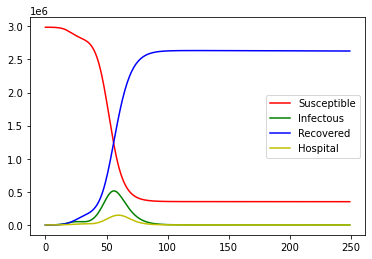

In [3]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,3].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,3].argmax()/12)
)
# plot result
sir_plot(res["baseline"][0])

(3000, 309)
2636914.5892456016


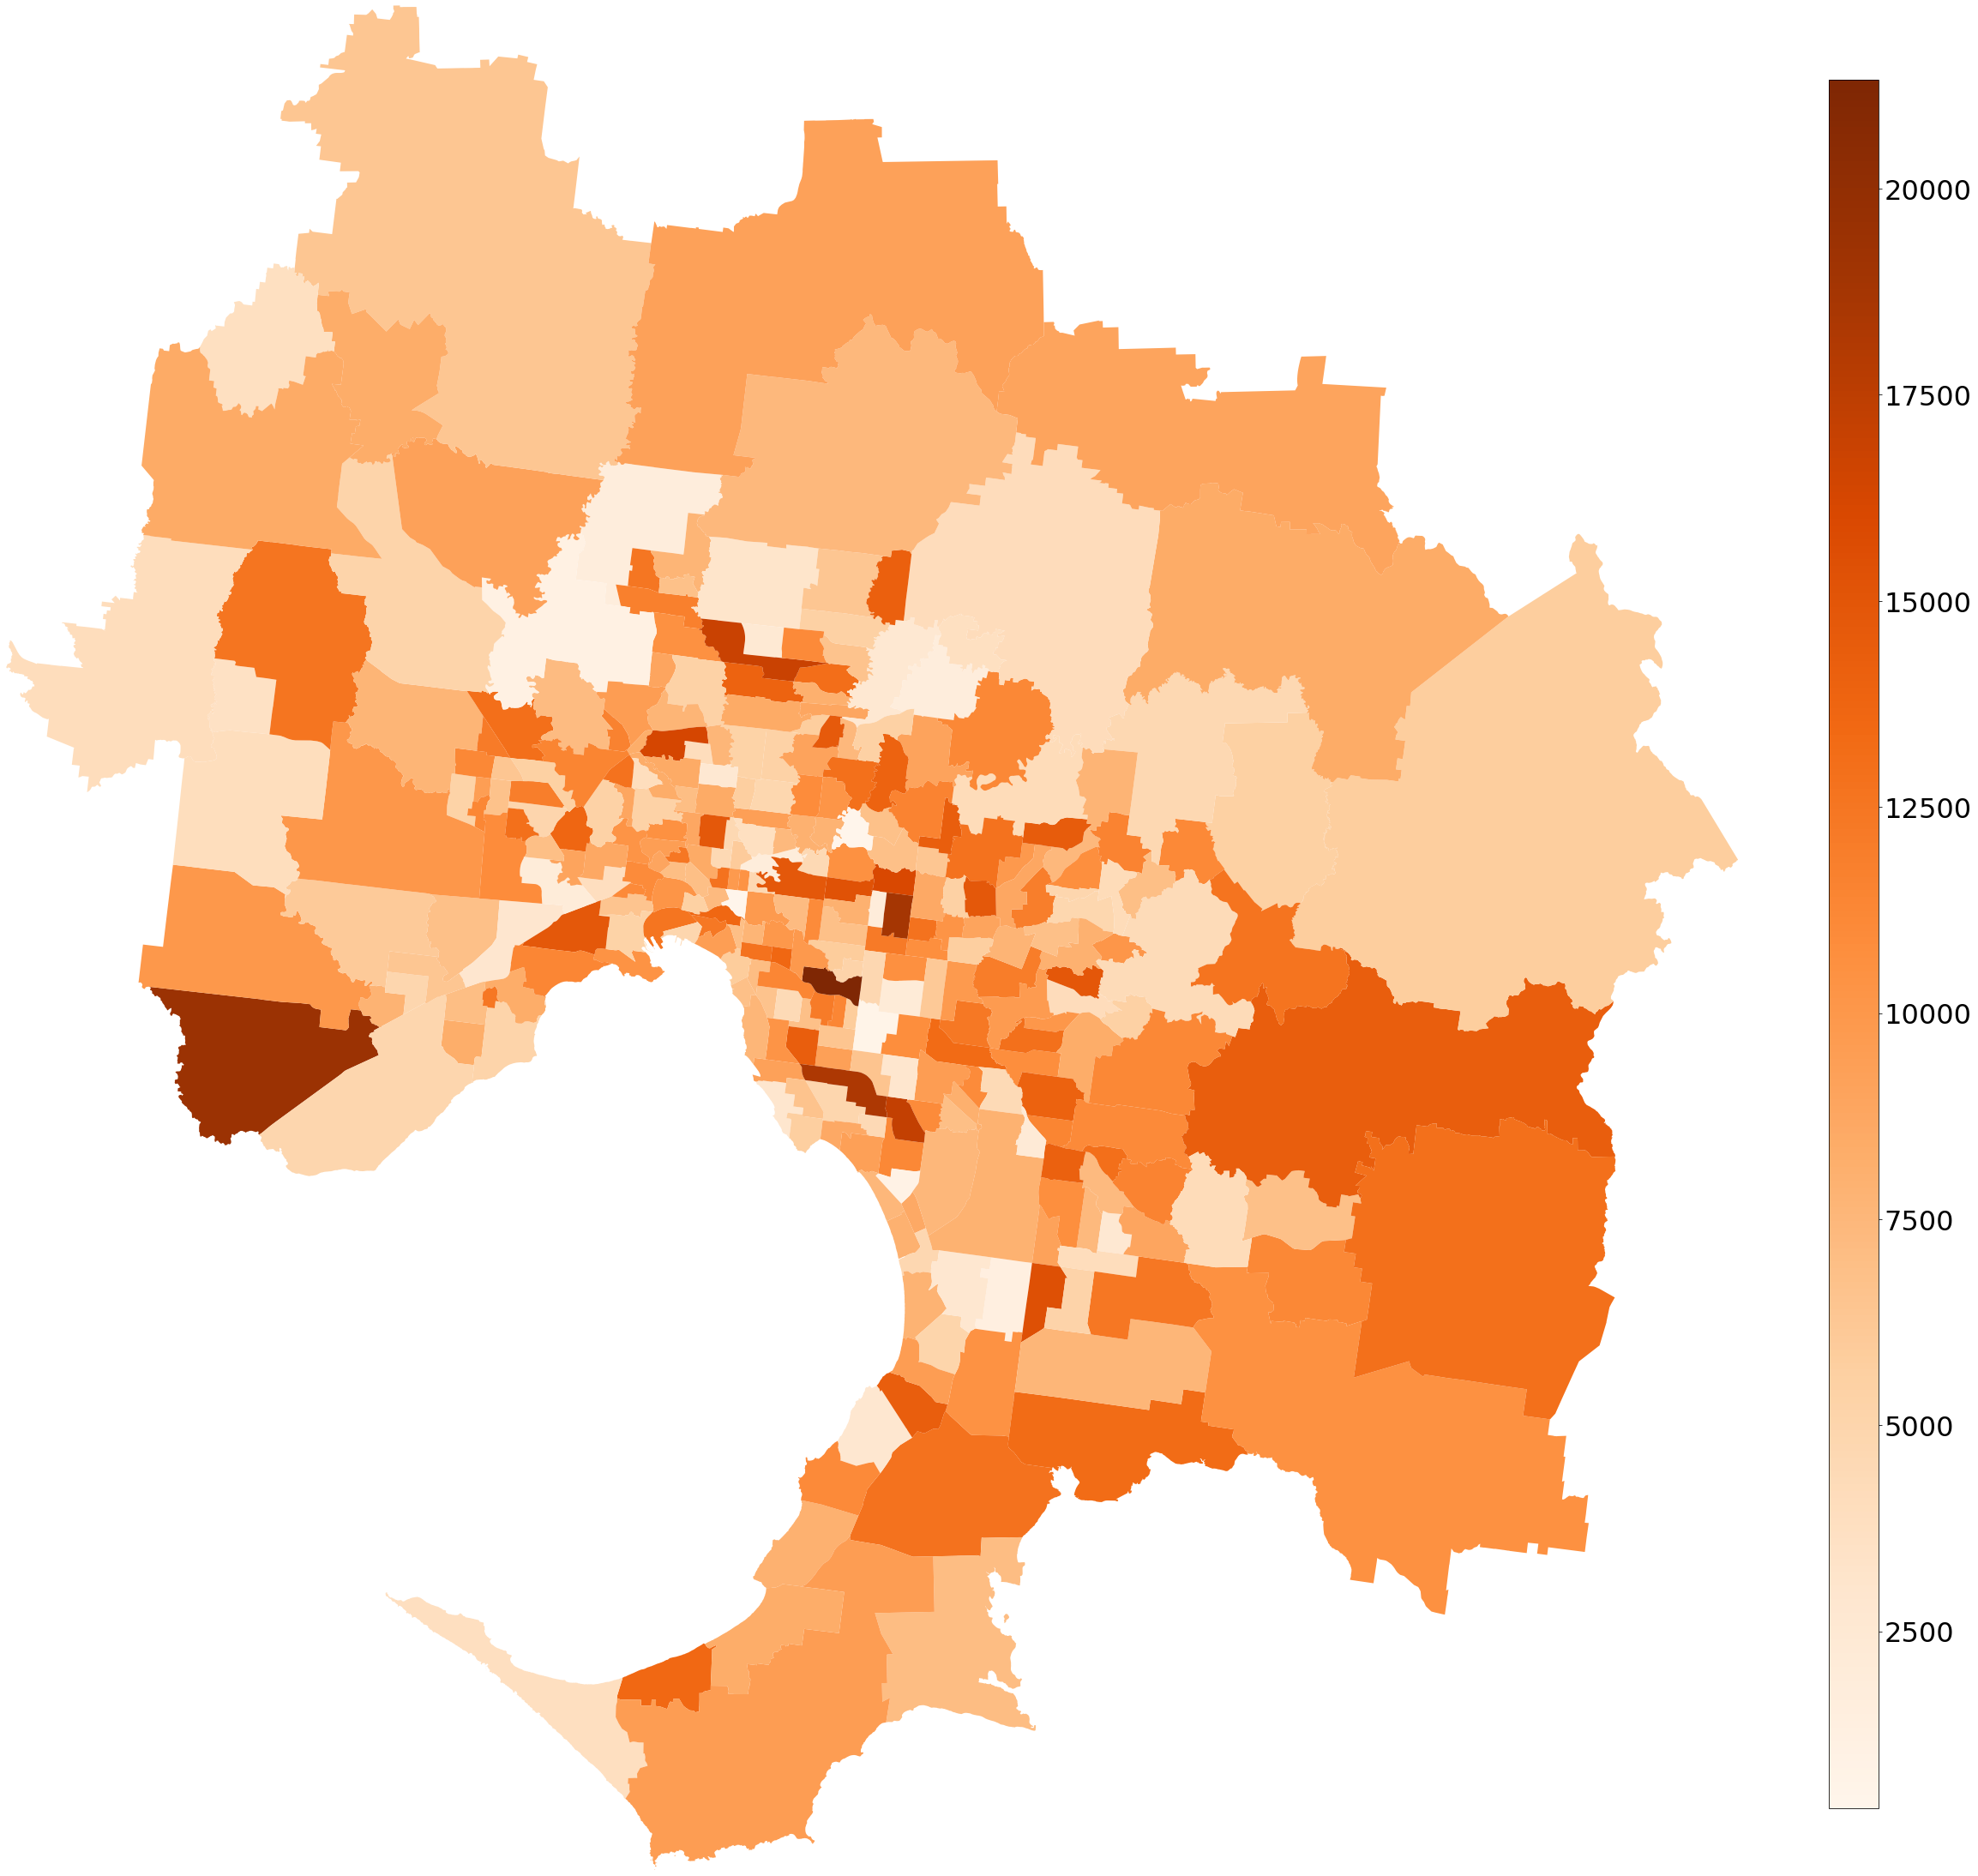

In [13]:
import geopandas as gpd
import contextily as ctx

melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig("melbourne_infect_work_from_home_dis.jpg")
plt.show()